# [Atractor de lorentz](https://en.wikipedia.org/wiki/Lorenz_system)



Dada el siguiente sistema de ecuaciones, asociadas a un modelo simplificado de la atomosfera, encontrar los valores de x, y, z.

\begin{equation}
\frac{\mathrm{d}x}{\mathrm{d}t} = \sigma (y-x)
\end{equation}


\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} = x(\rho-z)-y
\end{equation}

\begin{equation}
\frac{\mathrm{d}z}{\mathrm{d}t} = xy-\beta z
\end{equation}

El modelo anteror permite describir de un a manera simplificada el movimiento atmosférico de masas de aire, los valores x, y, z se corresponden a posiciones de un volumen que contiene  una masa de aire, y los párametros $\sigma$, $\beta$ y  $\rho$ hacen referencia a, las siguientes cantidades fisicas:

\begin{equation}
\sigma = \frac{\mathrm{viscosidad}}{\mathrm{conductividad\ térmica }},
\end{equation}

$\rho$ hace refencia al término de convección entre el suelo y el techo del volumen discretizado.

\begin{equation}
\rho =\frac{g\beta}{v \alpha} (T_s-T_{\infty})L^3
\end{equation}

y $\beta=\frac{\mathrm{Ancho\ del\ cubo}}{\mathrm{Altura\ de\ la\ caja}}$ es un termino geométrico.


<!-- Tiene puntos de equilibrio en
- $(x, y, z)=(0,0,0)$
- $(\pm \sqrt{\beta(\rho-1}),\pm \sqrt{\beta(\rho-1}),\rho-1)$

El sistema de ecuaciones anterior puede ser escrito como:
\begin{equation}
\begin{pmatrix}
-\sigma & \sigma & 0\\
\rho-z & -1 & 0\\
y & 0 & -\beta
\end{pmatrix}
\end{equation} -->



Emplee la integración: [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html), realice la integración del sistema de ecuaciones diferenciales

In [39]:
import numpy as np
import matplotlib.pylab as plt
import scipy.integrate as spi

In [41]:
def lorentz(r ,t, sigma, rho, beta):
    x0 = r[0]
    y0 = r[1]
    z0 = r[2]

    dxdt = sigma * (y0 - x0)
    dydt = x0 * (rho - z0) - y0
    dzdt = x0 * y0 - beta * z0

    return np.array([dxdt, dydt, dzdt])

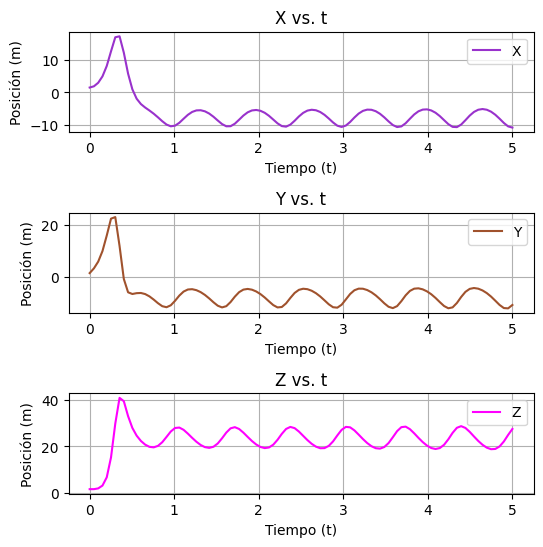

In [60]:
r0 = np.array([1.5, 1.5, 1.5])

sigma = 10
rho = 25
beta = 8. / 3


t = np.linspace(0, 5, 100)
params = (sigma, rho, beta)

solucion = spi.odeint(lorentz, r0, t, args = params)

x = solucion[:, 0]
y = solucion[:, 1]
z = solucion[:, 2]

# GRÁFICA
fig, axs = plt.subplots(3, 1, figsize=(6, 6))
plt.subplots_adjust(hspace=0.8)

# X vs t
axs[0].plot(t, x, color='darkorchid', label="X")
axs[0].set_title("X vs. t")
axs[0].set_ylabel("Posición (m)")
axs[0].set_xlabel("Tiempo (t)")
axs[0].grid(True)
axs[0].legend()

# Y vs t
axs[1].plot(t, y, color='sienna', label="Y")
axs[1].set_title("Y vs. t")
axs[1].set_ylabel("Posición (m)")
axs[1].set_xlabel("Tiempo (t)")
axs[1].grid(True)
axs[1].legend()

# Z vs t
axs[2].plot(t, z, color='fuchsia', label="Z")
axs[2].set_title("Z vs. t")
axs[2].set_ylabel("Posición (m)")
axs[2].set_xlabel("Tiempo (t)")
axs[2].grid(True)
axs[2].legend()

#Gráfica con Plotly

In [62]:
# prompt: haz un grafico en 3d de x vs t, y vs t, z vs t

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name='Trayectoria'))

fig.update_layout(
    title='Trayectoria en 3D',
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='z'
    )
)

fig.show()


In [63]:
# prompt: crea una gráfica de x vs t, y vs t, z vs t usando plotly. garantiza que los ejes tengan nombre y unidades, y que todo se vea claramente

# Assuming x, y, z, and t are defined from the previous code

fig = go.Figure()

# Add traces for x vs t, y vs t, and z vs t
fig.add_trace(go.Scatter(x=t, y=x, mode='lines', name='x(t)', line=dict(color='darkorchid')))
fig.add_trace(go.Scatter(x=t, y=y, mode='lines', name='y(t)', line=dict(color='sienna')))
fig.add_trace(go.Scatter(x=t, y=z, mode='lines', name='z(t)', line=dict(color='fuchsia')))

# Update layout for better visualization
fig.update_layout(
    title='Lorenz System Simulation',
    xaxis_title='Time (t)',
    yaxis_title='Position (m)',
    xaxis=dict(showgrid=True, zeroline=True),
    yaxis=dict(showgrid=True, zeroline=True),
    legend=dict(x=0, y=1),  # Adjust legend position if needed
    template='plotly_white'  # Use a visually appealing template
)

fig.show()
